In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt  


from google.colab import drive

In [10]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/Prediction/'
os.chdir(data_dir)

In [0]:
#Import my own code
import pipeline as pp
from final import *

# Bigquery

In [13]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
#Getting the data for predicting spring CGP

%%bigquery --project ds-student-data df

SELECT *
FROM `ds-student-data.NweaAnalysis.RegressionforStoSGrowth`

In [15]:
df.shape

(79865, 11)

# Clean the data

In [16]:
df.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,SpringtoSpringConditionalGrowthPercentile,TestRITScore
0,Spring 2016-2017,50026009,Irving Park,7,Mathematics,96,NaN,NaN,47,97.0,259
1,Spring 2016-2017,50026009,Irving Park,7,Reading,98,NaN,NaN,65,81.0,248
2,Spring 2016-2017,50033714,Irving Park,8,Mathematics,89,NaN,NaN,53,47.0,254
3,Spring 2016-2017,50033714,Irving Park,8,Reading,83,NaN,NaN,53,61.0,235
4,Spring 2016-2017,50067283,Irving Park,6,Mathematics,79,NaN,NaN,51,40.0,239


In [0]:
df['RoundRIT']= df['TestRITScore'].copy()

In [0]:
#Round the RIT Score to the nearest 10
df['RoundRIT'] = df['TestRITScore'].apply(lambda x: int(round(x/10.0)*10.0))

In [0]:
#round the testPercentile/PercentCorrect to nearest 5
df['TestPercentile'] = df['TestPercentile'].apply(lambda x: int(round(x/5.0)*5.0))

In [0]:
df['PercentCorrect'] = df['PercentCorrect'].apply(lambda x: int(round(x/5.0)*5.0))

In [0]:
spring = df[df['TermName'].str.contains("Spring")]

In [0]:
winter = df[df['TermName'].str.contains("Winter")]

In [23]:
winter['FtWCGI']=pd.qcut(winter['FalltoWinterConditionalGrowthIndex'], q=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
winter['WtWCGI']=pd.qcut(winter['WintertoWinterConditionalGrowthIndex'], q=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
spring.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,SpringtoSpringConditionalGrowthPercentile,TestRITScore,RoundRIT
0,Spring 2016-2017,50026009,Irving Park,7,Mathematics,95,NaN,NaN,45,97.0,259,260
1,Spring 2016-2017,50026009,Irving Park,7,Reading,100,NaN,NaN,65,81.0,248,250
2,Spring 2016-2017,50033714,Irving Park,8,Mathematics,90,NaN,NaN,55,47.0,254,250
3,Spring 2016-2017,50033714,Irving Park,8,Reading,85,NaN,NaN,55,61.0,235,240
4,Spring 2016-2017,50067283,Irving Park,6,Mathematics,80,NaN,NaN,50,40.0,239,240


In [0]:
ks = ['StudentID', 'Grade', 'Discipline','SpringtoSpringConditionalGrowthPercentile']

In [0]:
spring = spring[ks]

In [28]:
spring.shape

(35990, 4)

In [29]:
winter.shape

(43875, 14)

In [0]:
winter =winter.dropna(axis=1, how='all')

In [31]:
winter.tail()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
79858,Winter 2017-2018,9983446858,DCP Harper Woods,K,Reading,80,2.17,NaN,60,161,160,"(1.11, 11.88]",NaN
79859,Winter 2018-2019,9998089778,DCP Harper Woods,4,Mathematics,10,-0.64,-1.23,50,192,190,"(-1.14, -0.38]","(-10.770999999999999, -1.05]"
79860,Winter 2018-2019,9998089778,DCP Harper Woods,4,Reading,30,-0.57,0.66,45,195,200,"(-1.14, -0.38]","(0.29, 1.03]"
79861,Winter 2017-2018,9998089778,DCP Harper Woods,3,Mathematics,25,-0.41,NaN,50,187,190,"(-1.14, -0.38]",NaN
79862,Winter 2017-2018,9998089778,DCP Harper Woods,3,Reading,15,-2.18,NaN,45,180,180,"(-8.901, -1.14]",NaN


In [0]:
test2020 = winter[winter.TermName=='Winter 2019-2020']

In [0]:
rv = pd.merge(spring, winter, on=[ 'StudentID','Grade','Discipline'])

In [34]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
0,50026009,7,Mathematics,97.0,Winter 2016-2017,Irving Park,90,-0.03,0.76,55,247,250,"(-0.38, 0.28]","(0.29, 1.03]"
1,50026009,7,Reading,81.0,Winter 2016-2017,Irving Park,85,0.19,1.80,55,234,230,"(-0.38, 0.28]","(1.03, 13.54]"
2,50033714,8,Mathematics,47.0,Winter 2016-2017,Irving Park,75,-0.27,-0.93,50,241,240,"(-0.38, 0.28]","(-1.05, -0.32]"
3,50033714,8,Reading,61.0,Winter 2016-2017,Irving Park,90,0.66,0.92,55,239,240,"(0.28, 1.11]","(0.29, 1.03]"
4,50067283,6,Mathematics,40.0,Winter 2016-2017,Irving Park,85,0.38,0.89,50,239,240,"(0.28, 1.11]","(0.29, 1.03]"


In [35]:
test2020.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
test2020.shape

(4716, 13)

In [37]:
test2020.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
21460,Winter 2019-2020,1119615326,DCP Harper Woods,1,Reading,65,-1.19,0.14,50,176,180,"(-8.901, -1.14]","(-0.32, 0.29]"
21461,Winter 2019-2020,1119615326,DCP Harper Woods,1,Mathematics,95,1.53,1.68,55,193,190,"(1.11, 11.88]","(1.03, 13.54]"
21462,Winter 2019-2020,1414215593,DCP Harper Woods,1,Reading,55,0.86,1.09,55,174,170,"(0.28, 1.11]","(1.03, 13.54]"
21463,Winter 2019-2020,1414215593,DCP Harper Woods,1,Mathematics,55,0.11,0.35,55,175,180,"(-0.38, 0.28]","(0.29, 1.03]"
21464,Winter 2019-2020,1702481794,DCP Harper Woods,1,Reading,10,-1.94,-1.41,50,153,150,"(-8.901, -1.14]","(-10.770999999999999, -1.05]"


In [0]:
rv.dropna(inplace=True)

In [39]:
rv.shape

(28869, 14)

In [40]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
0,50026009,7,Mathematics,97.0,Winter 2016-2017,Irving Park,90,-0.03,0.76,55,247,250,"(-0.38, 0.28]","(0.29, 1.03]"
1,50026009,7,Reading,81.0,Winter 2016-2017,Irving Park,85,0.19,1.80,55,234,230,"(-0.38, 0.28]","(1.03, 13.54]"
2,50033714,8,Mathematics,47.0,Winter 2016-2017,Irving Park,75,-0.27,-0.93,50,241,240,"(-0.38, 0.28]","(-1.05, -0.32]"
3,50033714,8,Reading,61.0,Winter 2016-2017,Irving Park,90,0.66,0.92,55,239,240,"(0.28, 1.11]","(0.29, 1.03]"
4,50067283,6,Mathematics,40.0,Winter 2016-2017,Irving Park,85,0.38,0.89,50,239,240,"(0.28, 1.11]","(0.29, 1.03]"


In [0]:
rv.to_csv('cleaned_data.csv', index=False)

# Read the clean data from here

In [0]:
#rv = pd.read_csv('cleaned_data.csv')

In [42]:
rv.shape

(28869, 14)

In [43]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
0,50026009,7,Mathematics,97.0,Winter 2016-2017,Irving Park,90,-0.03,0.76,55,247,250,"(-0.38, 0.28]","(0.29, 1.03]"
1,50026009,7,Reading,81.0,Winter 2016-2017,Irving Park,85,0.19,1.80,55,234,230,"(-0.38, 0.28]","(1.03, 13.54]"
2,50033714,8,Mathematics,47.0,Winter 2016-2017,Irving Park,75,-0.27,-0.93,50,241,240,"(-0.38, 0.28]","(-1.05, -0.32]"
3,50033714,8,Reading,61.0,Winter 2016-2017,Irving Park,90,0.66,0.92,55,239,240,"(0.28, 1.11]","(0.29, 1.03]"
4,50067283,6,Mathematics,40.0,Winter 2016-2017,Irving Park,85,0.38,0.89,50,239,240,"(0.28, 1.11]","(0.29, 1.03]"


In [44]:
rv['SpringtoSpringConditionalGrowthPercentile'].head()

0    97.0
1    81.0
2    47.0
3    61.0
4    40.0
Name: SpringtoSpringConditionalGrowthPercentile, dtype: float64

In [0]:
#bins the waittime by 20% of the data
PBINS = [0, 20, 40, 60, 80, 100]
LABLES = [0,1,2,3,4]

In [46]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
0,50026009,7,Mathematics,97.0,Winter 2016-2017,Irving Park,90,-0.03,0.76,55,247,250,"(-0.38, 0.28]","(0.29, 1.03]"
1,50026009,7,Reading,81.0,Winter 2016-2017,Irving Park,85,0.19,1.80,55,234,230,"(-0.38, 0.28]","(1.03, 13.54]"
2,50033714,8,Mathematics,47.0,Winter 2016-2017,Irving Park,75,-0.27,-0.93,50,241,240,"(-0.38, 0.28]","(-1.05, -0.32]"
3,50033714,8,Reading,61.0,Winter 2016-2017,Irving Park,90,0.66,0.92,55,239,240,"(0.28, 1.11]","(0.29, 1.03]"
4,50067283,6,Mathematics,40.0,Winter 2016-2017,Irving Park,85,0.38,0.89,50,239,240,"(0.28, 1.11]","(0.29, 1.03]"


In [0]:
#Save a clean copy for later viz purpose
viz_df = rv.copy()

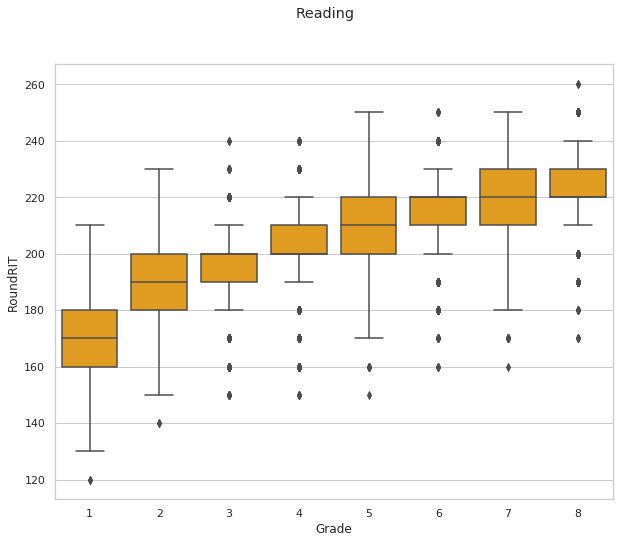

In [0]:
'''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('Reading')
sns.boxplot( x=read['Grade'], y=read["RoundRIT"], color="orange")
#sns.plt.show()
'''

In [0]:
rv.tail()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
35853,50067284,1,Reading,50.0,Winter 2011-2012,Irving Park,75,0.45,1.15,60,181,180,"(0.29, 1.11]","(1.03, 13.54]"
35854,50078972,1,Reading,56.0,Winter 2011-2012,West Belden,65,0.24,0.71,50,176,180,"(-0.37, 0.29]","(0.29, 1.03]"
35855,50134906,1,Reading,61.0,Winter 2011-2012,Bucktown,60,1.20,0.00,55,175,180,"(1.11, 11.88]","(-0.32, 0.29]"
35856,50136564,1,Reading,71.0,Winter 2011-2012,Irving Park,95,0.59,-0.19,65,191,190,"(0.29, 1.11]","(-0.32, 0.29]"
35857,50167001,1,Reading,63.0,Winter 2011-2012,Irving Park,95,-1.26,0.64,65,193,190,"(-8.901, -1.12]","(0.29, 1.03]"


In [48]:
whole =pd.concat([rv, test2020], axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [49]:
test2020.shape

(4716, 13)

In [50]:
whole.shape

(33585, 14)

In [51]:
whole.head()

,Discipline,FalltoWinterConditionalGrowthIndex,FtWCGI,Grade,PercentCorrect,RoundRIT,SchoolName,SpringtoSpringConditionalGrowthPercentile,StudentID,TermName,TestPercentile,TestRITScore,WintertoWinterConditionalGrowthIndex,WtWCGI
0,Mathematics,-0.03,"(-0.38, 0.28]",7,55,250,Irving Park,97.0,50026009,Winter 2016-2017,90,247,0.76,"(0.29, 1.03]"
1,Reading,0.19,"(-0.38, 0.28]",7,55,230,Irving Park,81.0,50026009,Winter 2016-2017,85,234,1.80,"(1.03, 13.54]"
2,Mathematics,-0.27,"(-0.38, 0.28]",8,50,240,Irving Park,47.0,50033714,Winter 2016-2017,75,241,-0.93,"(-1.05, -0.32]"
3,Reading,0.66,"(0.28, 1.11]",8,55,240,Irving Park,61.0,50033714,Winter 2016-2017,90,239,0.92,"(0.29, 1.03]"
4,Mathematics,0.38,"(0.28, 1.11]",6,50,240,Irving Park,40.0,50067283,Winter 2016-2017,85,239,0.89,"(0.29, 1.03]"


# Pre-processing

In [0]:
keep =['Grade', 'SchoolName', 'TestPercentile', 'WtWCGI', 'FtWCGI', 'RoundRIT']

In [0]:
read =whole[whole.Discipline=='Reading']
math =whole[whole.Discipline=='Mathematics']
rd =whole[whole.Discipline=='Reading']
md =whole[whole.Discipline=='Mathematics']

In [0]:
read = read[keep]
math = math[keep]

In [57]:
# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , keep)
for dummy in keep:
    read = pp.dummy_variable(dummy, read)
    math = pp.dummy_variable(dummy, math)
print (' ')

The following columns have been broken into dummies: ['Grade', 'SchoolName', 'TestPercentile', 'WtWCGI', 'FtWCGI', 'RoundRIT']
 


In [0]:
math.shape

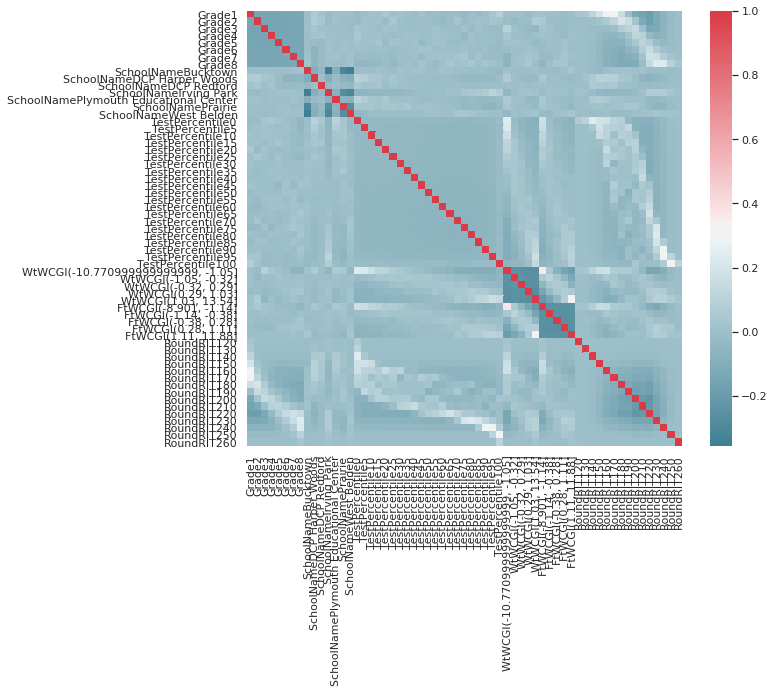

In [58]:
import numpy as np
pp.corr_matrix(read)

# Machine Learning

In [0]:
def plot_precision_recall_n(y_true, y_score, model_name):
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    
    name = model_name
    plt.title(name)
    plt.savefig(name)
    plt.show()

For math

In [0]:
#Creating the binary y variable for machine learning
math['Y'] = np.where(md['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

In [0]:
indepv = list(math.columns)
indepv.remove('Y')

In [62]:
md.TermName.unique()

array(['Winter 2016-2017', 'Winter 2014-2015', 'Winter 2012-2013',
       'Winter 2011-2012', 'Winter 2013-2014', 'Winter 2017-2018',
       'Winter 2015-2016', 'Winter 2018-2019', 'Winter 2019-2020'],
      dtype=object)

In [0]:
from sklearn.model_selection import train_test_split
x = math[indepv]
y = math['Y']  

In [0]:
x_train = x[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2014')]
y_train = y[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2014')]
x_val = x[md.TermName=='Winter 2018-2019']
y_val = y[md.TermName=='Winter 2018-2019']
x_test = x[md.TermName=='Winter 2019-2020']
y_test = y[md.TermName=='Winter 2019-2020']

In [85]:
x_test.shape

(2362, 63)

In [82]:
x_val.shape

(2284, 63)

In [86]:
x_train.shape

(3418, 63)

In [0]:
def slicedict(d, s):
    return {k:v for k,v in d.items() if k==s}

In [0]:
results = clf_loop(["RF",'Bag','Boost', 'ET', 'Tree'], x_train, x_val, y_train, y_val)

In [146]:
# Finding Base Probability of Not Grow in math
print ('Prob of Not Grow')
print (math['Y'].sum()/math.shape[0])

Prob of Not Grow
0.37513397642015006


In [79]:
#1 years train
#best = best_grid(results)

,model_type,parameters,accuracy,auc-roc,precision,time
26,Bag,"{'max_features': 10, 'max_samples': 5, 'n_esti...",0.434764,0.624578,0.519338,0.045454
34,Boost,"{'algorithm': 'SAMME', 'n_estimators': 100}",0.551226,0.653990,0.543718,0.341622
44,ET,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.533713,0.674306,0.576289,0.314862
5,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.517075,0.666212,0.564894,0.220114
72,Tree,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.553853,0.615097,0.477309,0.005996


In [75]:
#2 years train
#best = best_grid(results)

,model_type,parameters,accuracy,auc-roc,precision,time
23,Bag,"{'max_features': 5, 'max_samples': 10, 'n_esti...",0.627846,0.630161,0.523748,0.108294
35,Boost,"{'algorithm': 'SAMME', 'n_estimators': 1000}",0.599825,0.647916,0.545886,4.681669
45,ET,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.629159,0.665780,0.568744,0.448778
1,RF,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.625657,0.665683,0.564958,0.283086
72,Tree,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.612522,0.620906,0.484832,0.005523


In [88]:
#3 years train
best = best_grid(results)

,model_type,parameters,accuracy,auc-roc,precision,time
30,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.605517,0.631163,0.525811,0.047090
35,Boost,"{'algorithm': 'SAMME', 'n_estimators': 1000}",0.599825,0.647916,0.545886,4.441312
63,ET,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.629159,0.663165,0.561861,0.449898
5,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.624781,0.668824,0.566341,0.264934
79,Tree,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.562609,0.627782,0.490240,0.006550


In [0]:
def Predicting(x_train,  y_train, test, grid):
    models = []
    for row in grid:
        models.append(row)
        
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = grid[models[index]]
        for p in ParameterGrid(model_params):
                clf.set_params(**p)
    model = clf.fit(x_train, y_train)
    rv = clf.fit(x_train, y_train).predict_proba(test)[:,1]
                  
    return model, rv

<Figure size 432x288 with 0 Axes>

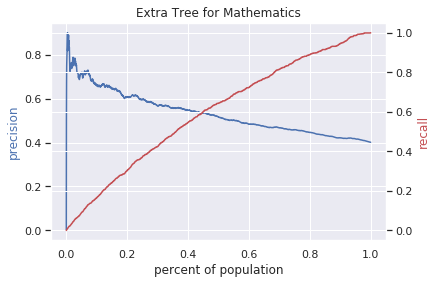

In [153]:
plot_precision_recall_n(y_val, predy,'Extra Tree for Mathematics')

In [0]:
#Select the best classifer for math
mclf = slicedict(best, 'ET')

In [0]:
mmodel, predy =Predicting(x_train, y_train, x_val, mclf)

In [93]:
!pip3 install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394158 sha256=b661c1a2cb3371765025cdaee78fc849e9f549b26551993ab2b421e46b91751e
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


Feature ranking for Y
1. Grade7 (0.116463)
2. RoundRIT230 (0.074400)
3. WtWCGI(1.03, 13.54] (0.072772)
4. FtWCGI(-8.901, -1.14] (0.072273)
5. Grade2 (0.053894)
6. WtWCGI(-10.770999999999999, -1.05] (0.047839)
7. RoundRIT240 (0.043814)
8. Grade3 (0.039291)
9. RoundRIT190 (0.038901)
10. TestPercentile100 (0.034203)
11. TestPercentile95 (0.032377)
12. SchoolNameIrving Park (0.026454)
13. FtWCGI(1.11, 11.88] (0.020607)
14. RoundRIT200 (0.018572)
15. Grade8 (0.017934)
16. Grade1 (0.015348)
17. TestPercentile5 (0.013941)
18. RoundRIT170 (0.013757)
19. TestPercentile15 (0.013543)
20. SchoolNameWest Belden (0.013361)


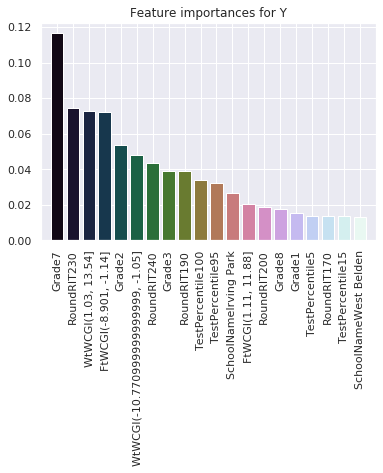

In [231]:
feature_importance(x_train, y_train, best, "ET", 20)

# For reading


In [0]:
#Creating the binary y variable for machine learning
read['Y'] = np.where(rd['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

In [116]:
# Finding Base Probability of not grow in Reading
print ('Prob of not grow')
print ( 1- read['Y'].sum()/read.shape[0])

Prob of not grow
0.659639092370913


In [0]:
indepv = list(read.columns)
indepv.remove('Y')

In [0]:
xr = read[indepv]
yr = read['Y']  

In [0]:
x_trainr = xr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')]
y_trainr = yr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')]
x_vr = xr[rd.TermName=='Winter 2018-2019']
y_vr = yr[rd.TermName=='Winter 2018-2019']
x_testr = xr[rd.TermName=='Winter 2019-2020']
y_testr = yr[rd.TermName=='Winter 2019-2020']

In [0]:
resultr = clf_loop(["RF",'Bag','Boost', 'ET', 'KNN','Tree'], x_trainr, x_vr, y_trainr, y_vr)

In [127]:
bestr = best_grid(resultr)

,model_type,parameters,accuracy,auc-roc,precision,time
21,Bag,"{'max_features': 5, 'max_samples': 10, 'n_esti...",0.627067,0.641340,0.489556,0.027109
35,Boost,"{'algorithm': 'SAMME', 'n_estimators': 1000}",0.661880,0.678805,0.570482,5.642391
60,ET,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.666232,0.684730,0.570357,0.315363
76,KNN,"{'algorithm': 'auto', 'n_neighbors': 50, 'weig...",0.663621,0.680344,0.568061,2.989756
5,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.664926,0.686450,0.570239,0.301113
78,Tree,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.659269,0.652243,0.495882,0.007269


In [0]:
rclf = slicedict(bestr, 'RF')

In [0]:
rmodel, predr =Predicting(x_trainr, y_trainr, x_vr, rclf)

<Figure size 432x288 with 0 Axes>

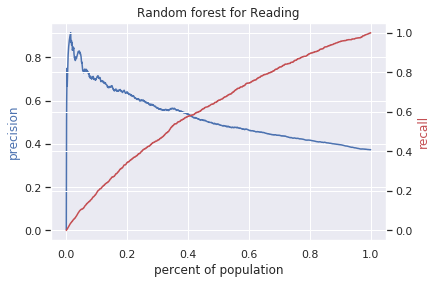

In [152]:
plot_precision_recall_n(y_vr, predr,'Random forest for Reading')

Feature ranking for Y
1. Grade3 (0.092072)
2. WtWCGI(-10.770999999999999, -1.05] (0.091936)
3. WtWCGI(1.03, 13.54] (0.072166)
4. Grade7 (0.063442)
5. RoundRIT160 (0.054980)
6. RoundRIT230 (0.044879)
7. TestPercentile0 (0.038705)
8. SchoolNamePrairie (0.035230)
9. RoundRIT240 (0.034315)
10. FtWCGI(-8.901, -1.14] (0.029243)
11. RoundRIT220 (0.027058)
12. TestPercentile5 (0.026107)
13. WtWCGI(0.29, 1.03] (0.020274)
14. TestPercentile90 (0.020108)
15. Grade4 (0.018755)
16. TestPercentile85 (0.018507)
17. TestPercentile80 (0.017643)
18. SchoolNameBucktown (0.015549)
19. TestPercentile20 (0.014745)
20. TestPercentile10 (0.012285)


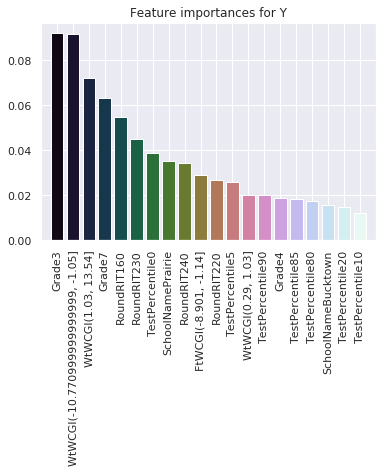

In [147]:
feature_importance(x_trainr, y_trainr, bestr, "RF", 20)

# Predicting 2019-2020 math

In [109]:
x_test.shape

(2362, 63)

In [0]:
xmath = x[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')|(md.TermName=='Winter 2018-2019')]
ymath = y[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')|(md.TermName=='Winter 2018-2019')]

In [97]:
xmath.shape

(7428, 63)

In [0]:
mmodel, pred2020 =Predicting(xmath, ymath, x_test, mclf)

In [0]:
math2020 = test2020[test2020.Discipline=='Mathematics']

In [100]:
math2020['math_pred']=pred2020

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
chischool= ['Prairie', 'Bucktown', 'Irving Park', 'West Belden']

In [0]:
math2020 =math2020[math2020.SchoolName.isin(chischool)]

In [0]:
math2020 =math2020.sort_values(by=['math_pred'], ascending=False)

In [112]:
math2020.shape[0]*0.4

702.0

In [0]:
features_to_see = [ 'SchoolName', 'Grade','TestPercentile','RoundRIT', 'FtWCGI', 'WtWCGI']

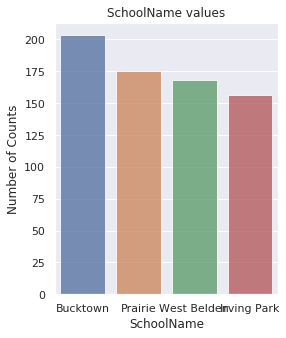

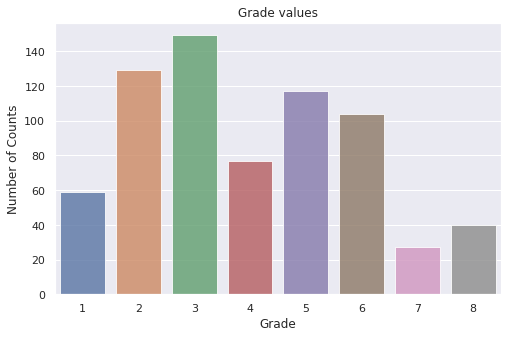

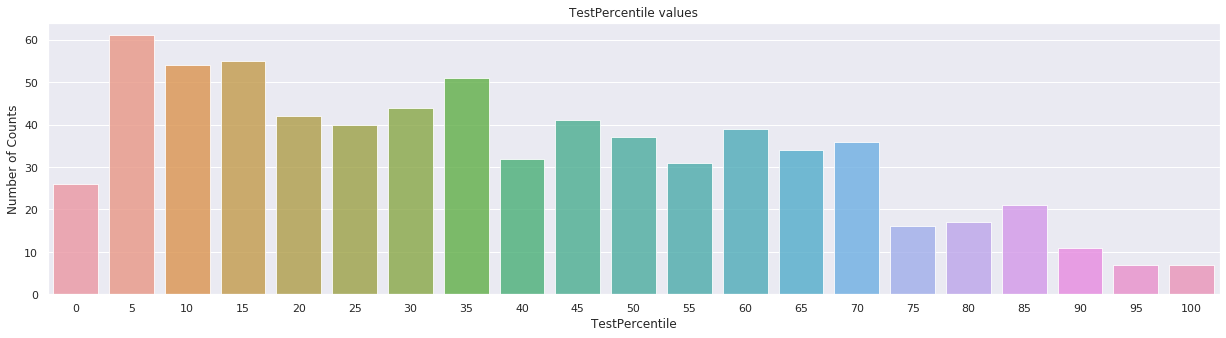

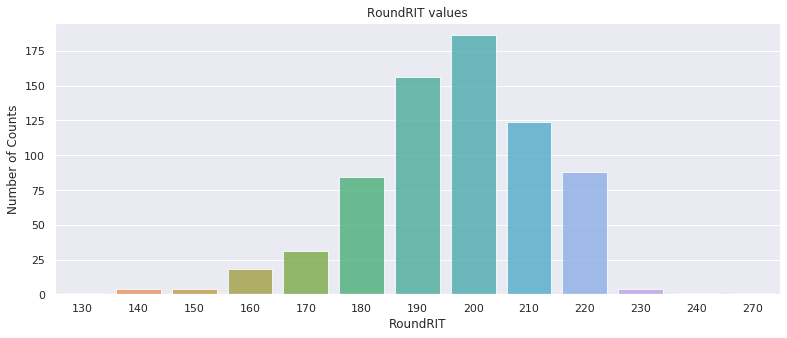

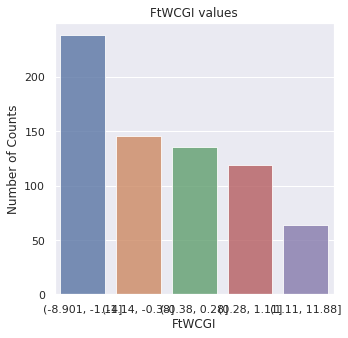

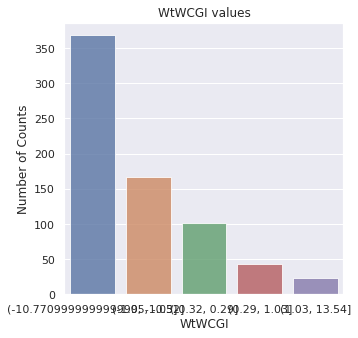

In [142]:
plot_df(math2020[:702], features_to_see, save=False)

# Predicting 2019-2020 Reading

In [0]:
xread = xr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')|(rd.TermName=='Winter 2018-2019')]
yread = yr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')|(rd.TermName=='Winter 2018-2019')]


In [125]:
x_testr.shape

(2354, 61)

In [0]:
rmodel, pred2020r =Predicting(xread, yread, x_testr, rclf)

In [0]:
read2020 = test2020[test2020.Discipline=='Reading']

In [132]:
read2020['read_pred']=pred2020r

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
read2020.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI,read_pred
21460,Winter 2019-2020,1119615326,DCP Harper Woods,1,Reading,65,-1.19,0.14,50,176,180,"(-8.901, -1.14]","(-0.32, 0.29]",0.438935
21462,Winter 2019-2020,1414215593,DCP Harper Woods,1,Reading,55,0.86,1.09,55,174,170,"(0.28, 1.11]","(1.03, 13.54]",0.358211
21464,Winter 2019-2020,1702481794,DCP Harper Woods,1,Reading,10,-1.94,-1.41,50,153,150,"(-8.901, -1.14]","(-10.770999999999999, -1.05]",0.577328
21466,Winter 2019-2020,1913574731,DCP Harper Woods,1,Reading,35,-1.16,-1.32,55,166,170,"(-8.901, -1.14]","(-10.770999999999999, -1.05]",0.534801
21468,Winter 2019-2020,2058040142,DCP Harper Woods,1,Reading,55,0.36,-0.71,45,173,170,"(0.28, 1.11]","(-1.05, -0.32]",0.423685


In [0]:
read2020 =read2020[read2020.SchoolName.isin(chischool)]

In [0]:
read2020 =read2020.sort_values(by=['read_pred'], ascending=False)

In [136]:
read2020.shape[0]*0.4

702.8000000000001

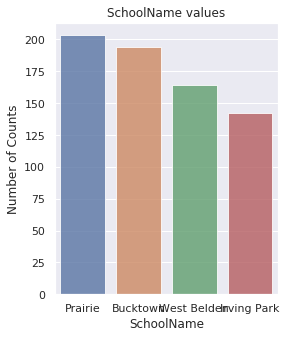

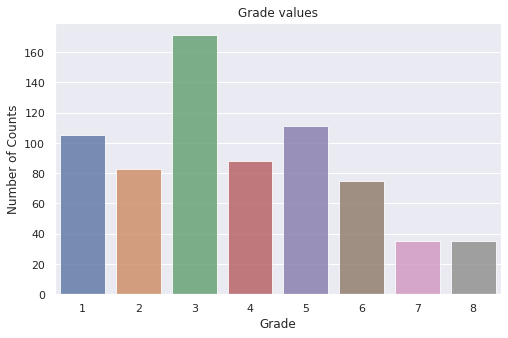

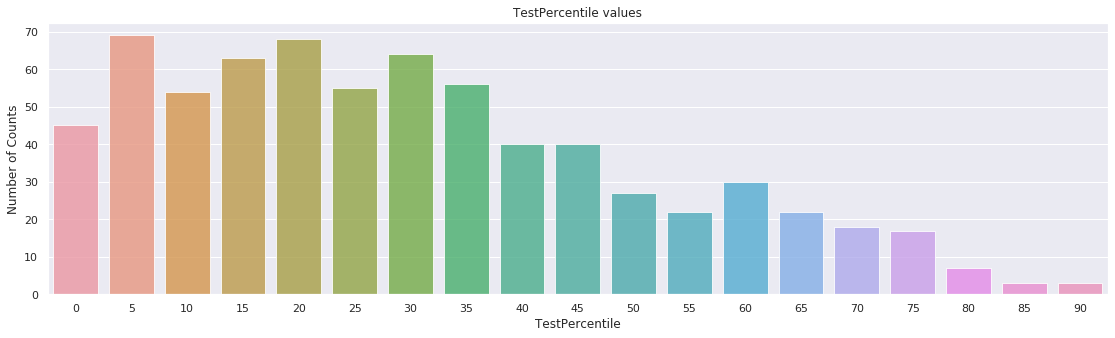

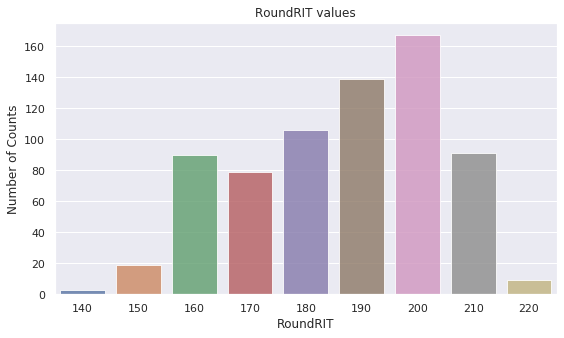

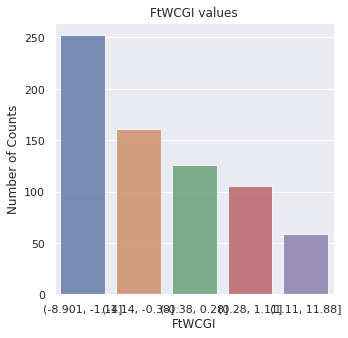

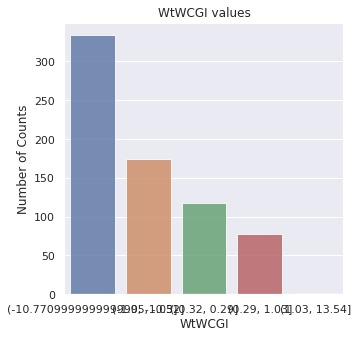

In [143]:
plot_df(read2020[:703], features_to_see, save=False)

In [0]:
math2020.to_csv('math_pred.csv', index=False)

In [0]:
read2020.to_csv('reading_pred.csv', index=False)

In [0]:
math[math.StudentID=='50237118']

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
5964,50237118,4,Mathematics,1.0,Winter 2018-2019,Prairie,30,0.36,0.53,50,200,200,"(0.29, 1.11]","(0.29, 1.03]"
5965,50237118,4,Mathematics,1.0,Winter 2018-2019,Prairie,30,0.36,0.53,50,200,200,"(0.29, 1.11]","(0.29, 1.03]"


# Testing different threshold

In [0]:
predy

array([0.45534996, 0.55737705, 0.47120419, ..., 0.39622642, 0.45534996,
       0.45534996])

In [0]:
x_test.head()

,Grade1,Grade2,Grade3,Grade4,Grade5,Grade6,Grade7,Grade8,SchoolNameBucktown,SchoolNameDCP Harper Woods,SchoolNameDCP Redford,SchoolNameIrving Park,SchoolNamePlymouth Educational Center,SchoolNamePrairie,SchoolNameWest Belden,TestPercentile0,TestPercentile5,TestPercentile10,TestPercentile15,TestPercentile20,TestPercentile25,TestPercentile30,TestPercentile35,TestPercentile40,TestPercentile45,TestPercentile50,TestPercentile55,TestPercentile60,TestPercentile65,TestPercentile70,TestPercentile75,TestPercentile80,TestPercentile85,TestPercentile90,TestPercentile95,TestPercentile100,"WtWCGI(-10.770999999999999, -1.05]","WtWCGI(-1.05, -0.31]","WtWCGI(-0.31, 0.3]","WtWCGI(0.3, 1.04]","WtWCGI(1.04, 13.54]","FtWCGI(-8.901, -1.12]","FtWCGI(-1.12, -0.37]","FtWCGI(-0.37, 0.3]","FtWCGI(0.3, 1.12]","FtWCGI(1.12, 11.88]",PercentCorrect25,PercentCorrect30,PercentCorrect35,PercentCorrect40,PercentCorrect45,PercentCorrect50,PercentCorrect55,PercentCorrect60,PercentCorrect65,PercentCorrect70,PercentCorrect75,PercentCorrect80,PercentCorrect85,RoundRIT110,RoundRIT130,RoundRIT140,RoundRIT150,RoundRIT160,RoundRIT170,RoundRIT180,RoundRIT190,RoundRIT200,RoundRIT210,RoundRIT220,RoundRIT230,RoundRIT240,RoundRIT250,RoundRIT260,RoundRIT270,RoundRIT280
587,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
600,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
601,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
603,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Vizualize the tree

In [0]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)
clf = clf.fit(X=train_x, y=train_y)

sklearn.tree._classes.DecisionTreeClassifier

In [0]:
import graphviz 
from sklearn import tree
from graphviz import Source

# Visualization
features = list(x_train.columns)
dot_data = tree.export_graphviz(mmodel, out_file=None, feature_names=features, 
                                filled=True, rounded=True, special_characters=True, )  
graph = graphviz.Source(dot_data)
graph

In [0]:
mmodel

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [0]:
explainer = shap.TreeExplainer(mmodel)
shap_values = explainer.shap_values(x_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


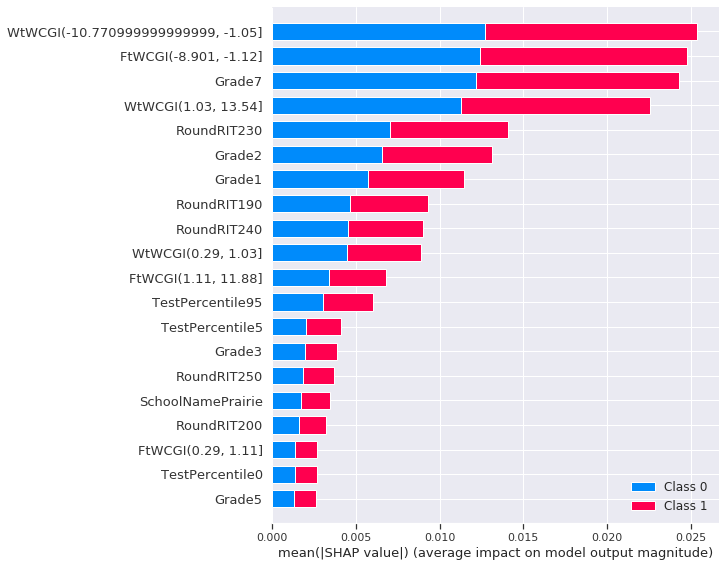

In [0]:
shap.summary_plot(shap_values, features=x, feature_names=x.columns)

In [0]:
predy

array([0.5743416 , 0.49483957, 0.53796123, ..., 0.41773347, 0.5081275 ,
       0.5081275 ])

In [0]:
My =pd.DataFrame(predy, columns=['math_pred'])

In [0]:
#bin the waittime by 10 categories
BINS = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
LABELS = range(10)
My['bin']=pd.cut(My['pred'], bins=BINS, labels = LABELS)


In [0]:
My.head()

,math_pred,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
0,0.574342,Winter 2019-2020,2909817682,Plymouth Educational Center,7,Reading,80,0.62,0.10,50,229,230,"(0.29, 1.11]","(-0.32, 0.29]"
1,0.494840,Winter 2019-2020,3496323659,Plymouth Educational Center,8,Reading,55,-0.23,-0.94,55,222,220,"(-0.37, 0.29]","(-1.05, -0.32]"
2,0.537961,Winter 2019-2020,1502579005,Plymouth Educational Center,8,Reading,60,-0.52,-0.01,45,223,220,"(-1.12, -0.37]","(-0.32, 0.29]"
3,0.528034,Winter 2019-2020,172550261,Plymouth Educational Center,8,Reading,50,-0.13,-0.73,50,219,220,"(-0.37, 0.29]","(-1.05, -0.32]"
4,0.536356,Winter 2019-2020,1974001148,Plymouth Educational Center,7,Reading,55,0.27,-0.72,55,218,220,"(-0.37, 0.29]","(-1.05, -0.32]"


In [0]:
math_at_risk_student = My[My.pred >= .35]

In [0]:
math_at_risk_student.shape[0]/My.shape[0]

0.40881590319792566

# Cross validation

In [229]:
explainer = shap.TreeExplainer(mmodel)
shap_values = explainerr.shap_values(x_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


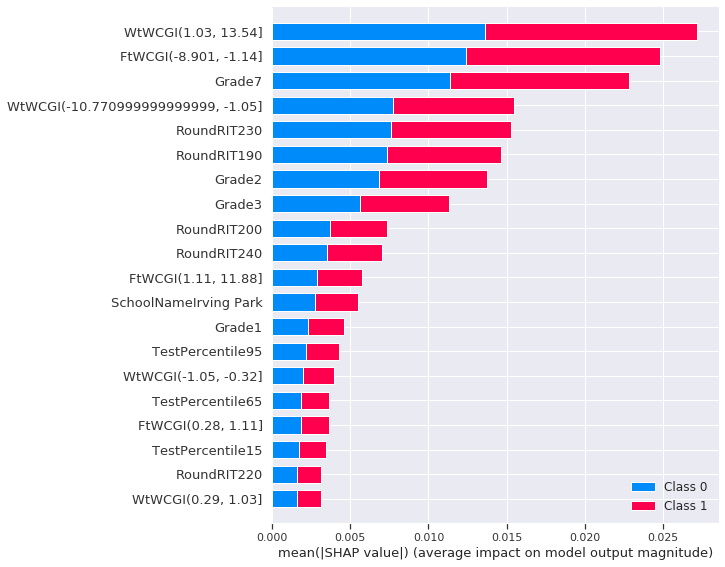

In [230]:
shap.summary_plot(shap_values, features=x_train, feature_names=x_train.columns)

In [0]:
mmodel, predy =Predicting(x_train, y_train, x_val, mclf)

In [0]:
My =pd.DataFrame(predy, columns=['math_pred'])

In [156]:
#Creating the binary y variable for machine learning
md['Y'] = np.where(md['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
true_y = md[md.TermName=='Winter 2018-2019']

In [0]:
true_y =true_y[['SpringtoSpringConditionalGrowthPercentile', 'Y']]

In [159]:
true_y.head()

,SpringtoSpringConditionalGrowthPercentile,Y
20512,1.0,1
20513,1.0,1
20516,8.0,1
20517,8.0,1
20520,65.0,0


In [160]:
#Potential baseline
md['SpringtoSpringConditionalGrowthPercentile'].median()

47.0

In [0]:
'''
#bins pred_y by 10% of the data
PBINS = [0,10,20,30,40,50,60,70,80,90,100]
LABELS = range(10)
#bin the waittime by 10 categories
true_y['Sbin']=pd.cut(true_y['SpringtoSpringConditionalGrowthPercentile'], bins=PBINS, labels = LABELS)

In [0]:
true_y=true_y.reset_index(drop=True)

In [162]:
true_y.head()

,SpringtoSpringConditionalGrowthPercentile,Y
0,1.0,1
1,1.0,1
2,8.0,1
3,8.0,1
4,65.0,0


In [0]:
My = pd.concat([My, true_y], axis=1)

In [164]:
My.head()

,math_pred,SpringtoSpringConditionalGrowthPercentile,Y
0,0.505019,1.0,1
1,0.505019,1.0,1
2,0.530903,8.0,1
3,0.530903,8.0,1
4,0.508864,65.0,0


In [0]:
#       Predict 0   1
# Actual
#   0          TN  FP
#   1          FN  TP

In [165]:
md['SpringtoSpringConditionalGrowthPercentile'].mean()/100

0.48298641906873613

In [170]:
#Potential baseline
base = md['SpringtoSpringConditionalGrowthPercentile'].median()/100
print('cutoff is ', base)
My['pred']= np.where(predy>= base, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :',accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted share of Not grow', My['pred'].sum()/My.shape[0])

cutoff is  0.47
[[587 780]
 [210 707]]
Accuracy Score : 0.5665499124343257
Report :
              precision    recall  f1-score   support

           0       0.74      0.43      0.54      1367
           1       0.48      0.77      0.59       917

    accuracy                           0.57      2284
   macro avg       0.61      0.60      0.57      2284
weighted avg       0.63      0.57      0.56      2284

The predicted share of Not grow 0.6510507880910683


In [172]:
My['pred']= np.where(predy>= .45, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :',accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted share of Not grow', My['pred'].sum()/My.shape[0])

[[470 897]
 [149 768]]
Accuracy Score : 0.542031523642732
Report :
              precision    recall  f1-score   support

           0       0.76      0.34      0.47      1367
           1       0.46      0.84      0.59       917

    accuracy                           0.54      2284
   macro avg       0.61      0.59      0.53      2284
weighted avg       0.64      0.54      0.52      2284

The predicted share of Not grow 0.728984238178634


In [175]:
My['pred']= np.where(predy>= .44, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :',accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted share of Not grow', My['pred'].sum()/My.shape[0])

[[391 976]
 [117 800]]
Accuracy Score : 0.5214535901926445
Report :
              precision    recall  f1-score   support

           0       0.77      0.29      0.42      1367
           1       0.45      0.87      0.59       917

    accuracy                           0.52      2284
   macro avg       0.61      0.58      0.51      2284
weighted avg       0.64      0.52      0.49      2284

The predicted share of Not grow 0.7775831873905429


In [173]:
My['pred']= np.where(predy>= .43, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :',accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted share of Not grow', My['pred'].sum()/My.shape[0])

[[ 310 1057]
 [  85  832]]
Accuracy Score : 0.5
Report :
              precision    recall  f1-score   support

           0       0.78      0.23      0.35      1367
           1       0.44      0.91      0.59       917

    accuracy                           0.50      2284
   macro avg       0.61      0.57      0.47      2284
weighted avg       0.65      0.50      0.45      2284

The predicted share of Not grow 0.8270577933450087


I am chosing .43 as the cutoff for maths, since we can get a recall of 91% and a f1-score of 59%. The predicted share of Not grow is .82

In [177]:
# Finding Base Probability of Not Grow in math
print ('Prob of Not grow')
print (math['Y'].sum()/math.shape[0])

Prob of Not grow
0.37513397642015006


# Reading

In [0]:
rmodel , pred_y =Predicting(x_trainr, y_trainr, x_testr, rclf)

In [0]:
import shap

In [183]:
explainerr = shap.TreeExplainer(rmodel)
shap_valuesr = explainerr.shap_values(x_trainr)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


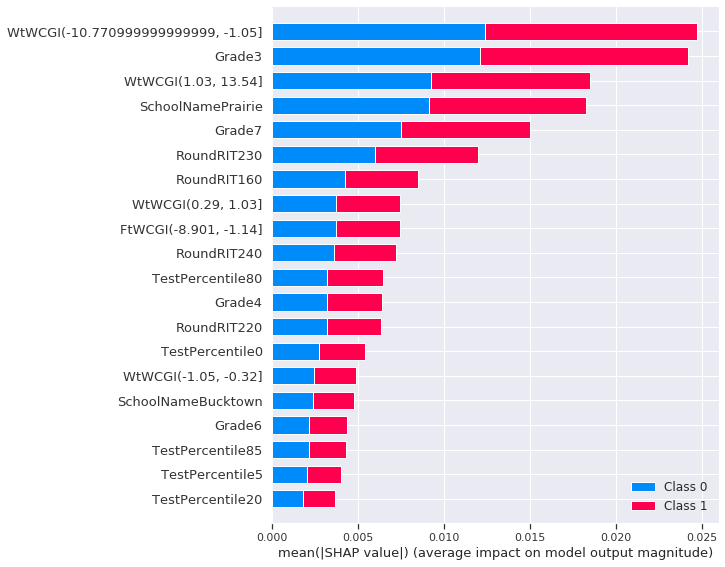

In [186]:
shap.summary_plot(shap_valuesr, features=x_trainr, feature_names=x_trainr.columns)

In [187]:
pred_y

array([0.38862821, 0.35512599, 0.50497648, ..., 0.29763813, 0.28747747,
       0.31614836])

In [0]:
py =pd.DataFrame(pred_y, columns=['pred'])

In [189]:
py.head()

,pred
0,0.388628
1,0.355126
2,0.504976
3,0.467381
4,0.395227


In [0]:
true_yr = rd[rd.TermName=='Winter 2018-2019']

In [194]:
true_yr.head()

,Discipline,FalltoWinterConditionalGrowthIndex,FtWCGI,Grade,PercentCorrect,RoundRIT,SchoolName,SpringtoSpringConditionalGrowthPercentile,StudentID,TermName,TestPercentile,TestRITScore,WintertoWinterConditionalGrowthIndex,WtWCGI,Sbin
20514,Reading,1.81,"(1.11, 11.88]",7,55,200,Prairie,5.0,45000419,Winter 2018-2019,20,203,-1.16,"(-10.770999999999999, -1.05]","(0, 20]"
20515,Reading,1.81,"(1.11, 11.88]",7,55,200,Prairie,5.0,45000419,Winter 2018-2019,20,203,-1.16,"(-10.770999999999999, -1.05]","(0, 20]"
20518,Reading,0.09,"(-0.38, 0.28]",6,50,200,Prairie,27.0,45483428,Winter 2018-2019,20,200,0.12,"(-0.32, 0.29]","(20, 40]"
20519,Reading,0.09,"(-0.38, 0.28]",6,50,200,Prairie,27.0,45483428,Winter 2018-2019,20,200,0.12,"(-0.32, 0.29]","(20, 40]"
20522,Reading,-1.98,"(-8.901, -1.14]",8,50,220,Prairie,18.0,50025527,Winter 2018-2019,60,223,-1.76,"(-10.770999999999999, -1.05]","(0, 20]"


In [192]:
#bins pred_y by 10% of the data

BINS = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
#bin the waittime by 10 categories
true_yr['Sbin']=pd.cut(true_yr['SpringtoSpringConditionalGrowthPercentile'], bins=PBINS)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
true_yr =true_yr[['SpringtoSpringConditionalGrowthPercentile', 'Sbin']]

In [0]:
true_yr=true_yr.reset_index(drop=True)

In [197]:
true_yr.head()

,SpringtoSpringConditionalGrowthPercentile,Sbin
0,5.0,"(0, 20]"
1,5.0,"(0, 20]"
2,27.0,"(20, 40]"
3,27.0,"(20, 40]"
4,18.0,"(0, 20]"


In [0]:
py = pd.concat([py, true_yr], axis=1)

In [0]:
#Creating the binary y variable for machine learning
py['Y'] = np.where(py['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

In [199]:
pred_y

array([0.38862821, 0.35512599, 0.50497648, ..., 0.29763813, 0.28747747,
       0.31614836])

In [207]:
py.head()

,pred,SpringtoSpringConditionalGrowthPercentile,Sbin,Y
0,0,5.0,"(0, 20]",1
1,0,5.0,"(0, 20]",1
2,1,27.0,"(20, 40]",1
3,1,27.0,"(20, 40]",1
4,0,18.0,"(0, 20]",1


In [0]:
pred_y.min()

0.23339883940209635

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
#Optimize for recall
tn, fp, fn, tp = confusion_matrix(py['Y'], py['pred']).ravel()
print('Recall :', tp/(fn+tp))
print('Precision :', tp/(fp+tp))

Recall : 0.5495915985997666
Precision : 0.521594684385382


In [219]:
py['pred']= np.where(pred_y>= .4, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :',accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))
print ('The predicted share of Not grow', py['pred'].sum()/py.shape[0])

[[855 642]
 [448 409]]
Accuracy Score : 0.5369583687340697
Report :
              precision    recall  f1-score   support

           0       0.66      0.57      0.61      1497
           1       0.39      0.48      0.43       857

    accuracy                           0.54      2354
   macro avg       0.52      0.52      0.52      2354
weighted avg       0.56      0.54      0.54      2354

The predicted share of Not grow 0.4464740866610025


I am chosing .3 as the cutoff for maths, since we can get a recall of 97% and a f1-score of 53%. The predicted share of Not grow is .82

In [223]:
py['pred']= np.where(pred_y>= .35, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :', accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))
print ('The predicted share of Not grow', py['pred'].sum()/py.shape[0])

[[ 316 1181]
 [ 153  704]]
Accuracy Score : 0.4333050127442651
Report :
              precision    recall  f1-score   support

           0       0.67      0.21      0.32      1497
           1       0.37      0.82      0.51       857

    accuracy                           0.43      2354
   macro avg       0.52      0.52      0.42      2354
weighted avg       0.56      0.43      0.39      2354

The predicted share of Not grow 0.8007646559048428


In [224]:
py['pred']= np.where(pred_y>= .38, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :', accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))
print ('The predicted share of Not grow', py['pred'].sum()/py.shape[0])

[[599 898]
 [302 555]]
Accuracy Score : 0.49022939677145283
Report :
              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1497
           1       0.38      0.65      0.48       857

    accuracy                           0.49      2354
   macro avg       0.52      0.52      0.49      2354
weighted avg       0.56      0.49      0.49      2354

The predicted share of Not grow 0.6172472387425658


In [222]:
py['pred']= np.where(pred_y>= .28, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :',accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))
print ('The predicted share of Not grow', py['pred'].sum()/py.shape[0])

[[  29 1468]
 [  13  844]]
Accuracy Score : 0.37085811384876805
Report :
              precision    recall  f1-score   support

           0       0.69      0.02      0.04      1497
           1       0.37      0.98      0.53       857

    accuracy                           0.37      2354
   macro avg       0.53      0.50      0.29      2354
weighted avg       0.57      0.37      0.22      2354

The predicted share of Not grow 0.9821580288870009


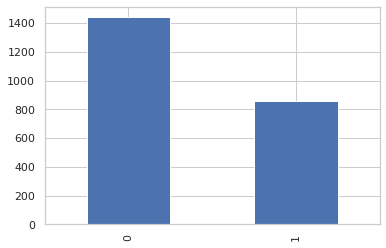

In [0]:
py['Y'].value_counts().plot.bar()

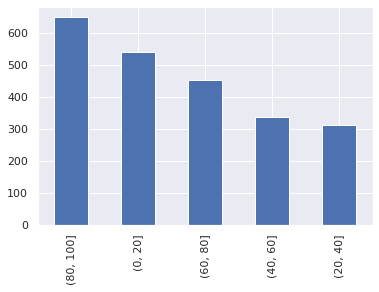

In [227]:
py['Sbin'].value_counts().plot.bar()

#Previous code

In [0]:
def logit(x_train, x_test, y_train, y_test):
    '''
    Run logit regression and print out the scores for comparison
    '''

    # get train/test data
     
    log = linear_model.LogisticRegression()
    log_model = log.fit(x_train, y_train)
    predictions = log_model.predict(x_test)

    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()

    print('Logit Score test + train:', log_model.score(x_test, y_test), log_model.score(x_train, y_train))

In [0]:
def feature_importance(x_train, y_train, clf, k=10):
    '''
    Based on the best grid for each classifer, print out the 
    top k important features
    '''

    indepv = list(x_train.columns)
    importances = clf.feature_importances_
    current_palette = sns.color_palette(sns.color_palette("cubehelix", k))
    
    indices = np.argsort(importances)[::-1]
    indices = indices[:k]

    # Print the feature ranking
    print("Feature ranking for %s" % (y_train.name))

    labels_arr = []
    for f in range(len(indices)):
        label = indepv[indices[f]]
        labels_arr.append(label)
        print("%d. %s (%f)" % (f+1, label, importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances for %s" % (y_train.name))
    plt.bar(range(len(indices)), importances[indices], align="center", tick_label = labels_arr, color= current_palette)
    plt.xlim([-1, len(indices)])
    plt.xticks(range(len(indices)),labels_arr, rotation = 'vertical')
    plt.show()
    return

In [0]:
def rf(x_train, x_test, y_train, y_test):
    '''
    Generate the random forest model using existing dataset
    Returns: (None)
       Save the random forest model using pickle
    
    '''
    rf_model = RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=10, n_estimators=10)
    rf_model.fit(x_train, y_train)
    predictions =  rf_model.predict(x_test)
    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()
    print(rf_model)
    print('RandomForest Score:',  rf_model.score(x_test, y_test),  rf_model.score(x_train, y_train))
    return rf_model


In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors.kde import KernelDensity
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def ols(x_train, x_test, y_train, y_test):
    '''
    Run ols regression and print out the scores for comparison
    '''
    # fit a OLS model
    ols = linear_model.LinearRegression()
    ols_model = ols.fit(x_train, y_train)
    predictions = ols.predict(x_test)

    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()

    print('OLS Score:', ols_model.score(x_test, y_test), ols_model.score(x_train, y_train))
    #return predictions, x_test, y_test